In [1]:
import game

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np

import agent

In [2]:
def visualize(stateHistory, actionHistory, rewardHistory, N):
    inventory = stateHistory[:, 0, :]
    orders = actionHistory[:, 1, :]
    serviceTimes = actionHistory[:, 0, :]
    reorderPoints = stateHistory[:, 1, :]
    
    print("Time Series")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        
        alpha = 1 if i == 2 else 0.3
#         plt.step(range(N+1), inventory[:, i] * np.roll(np.sign(orders[:, i]), -1), label="inventory")        
        plt.plot(range(N+1), inventory[:, i], label="inventory", alpha=alpha, c='b', linestyle='--', drawstyle='steps')
        plt.step(range(N+1), orders[:, i], label="order quantity", c='orange')
        if i == 2:
            plt.step(range(N+1), reorderPoints[:, i], label="reorder point", c='green')
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Service Time")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), serviceTimes[:, i], label="service time")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    
    print("Inventory")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), inventory[:, i] * np.sign(orders[:, i]), label="inventory")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Rewards")
    plt.figure(figsize=(20, 4))
    plt.step(range(N+1), rewardHistory)
    plt.show()

In [3]:
learningParams = {
    "gamma": 0.2,
    "alpha": 1,
    "epsilon": 0.5
}

envParams = {
    "inventoryCost": [5, 1000, 1000], #[5, 1000, 1000], # 
    "muDemand": 2,
    "stdDemand": 0.1,
    "retailerOrder": 10,
    "stockoutCost": 10000, #50000,
    "N": 1000
}

In [4]:
plannerAgent = agent.PlannerWithPolicyGradient(learningParams, envParams["retailerOrder"])
plannerAgent.policy_estimator.stdVal = 10

1/1 [==============================] - 0s 23ms/step
Time Series


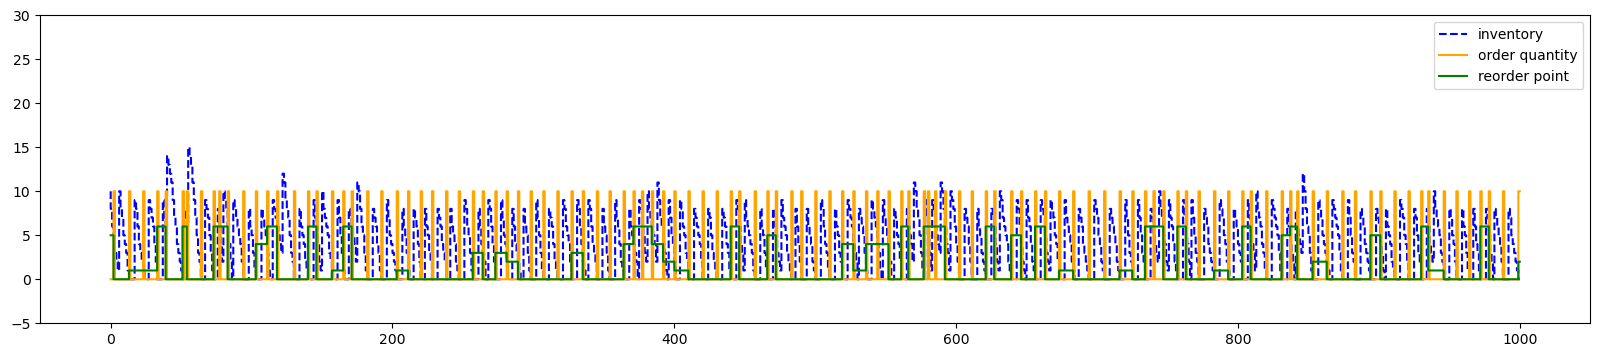

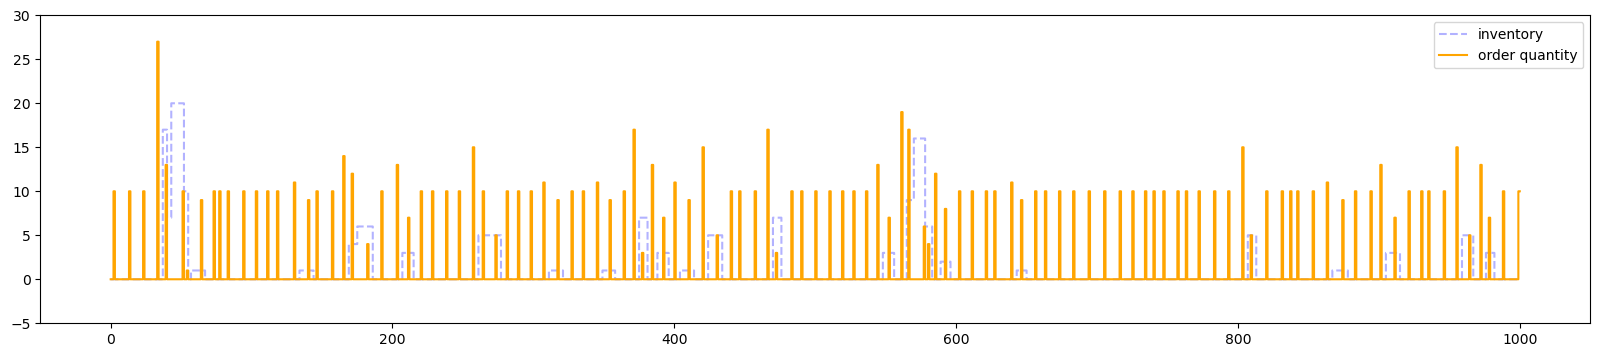

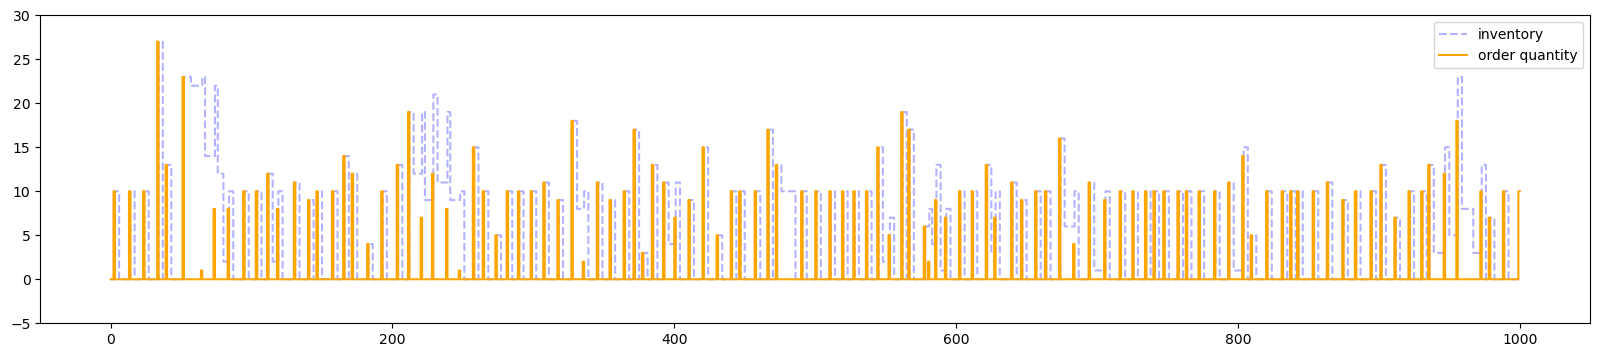

Service Time


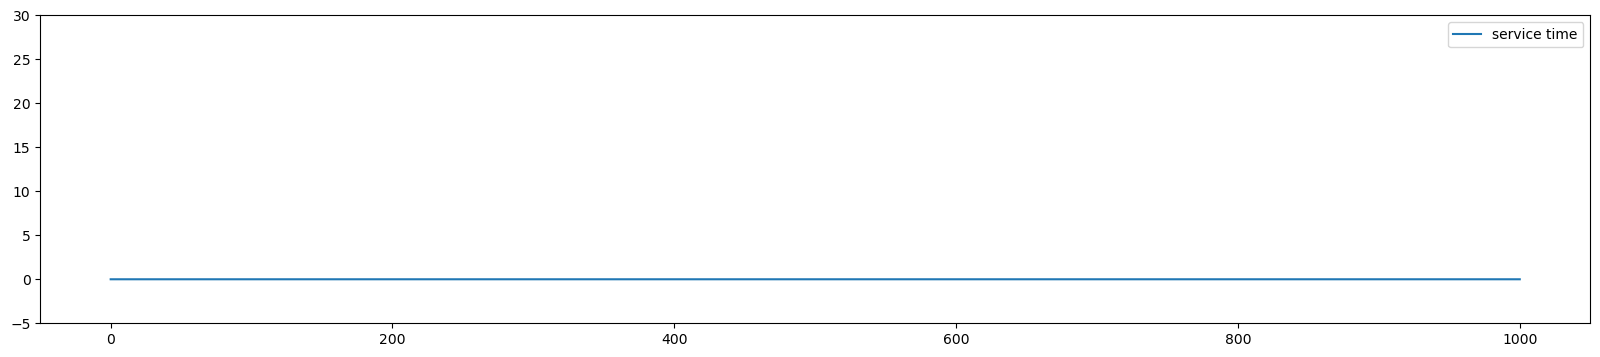

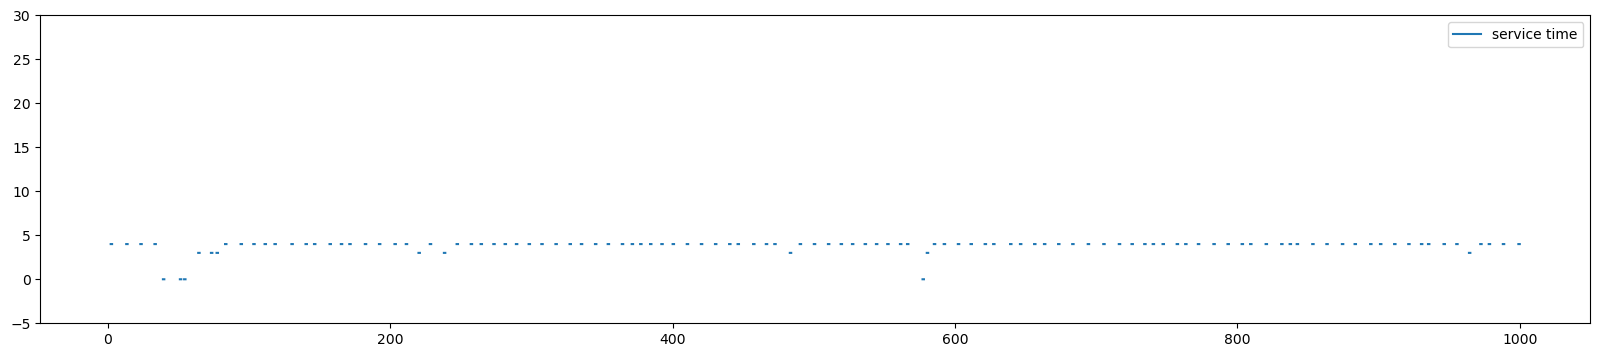

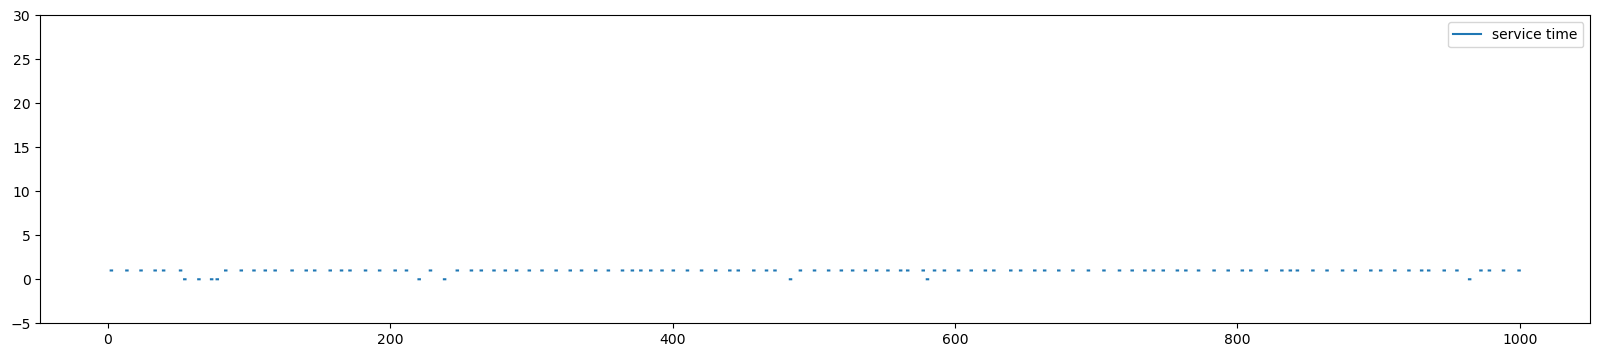

Inventory


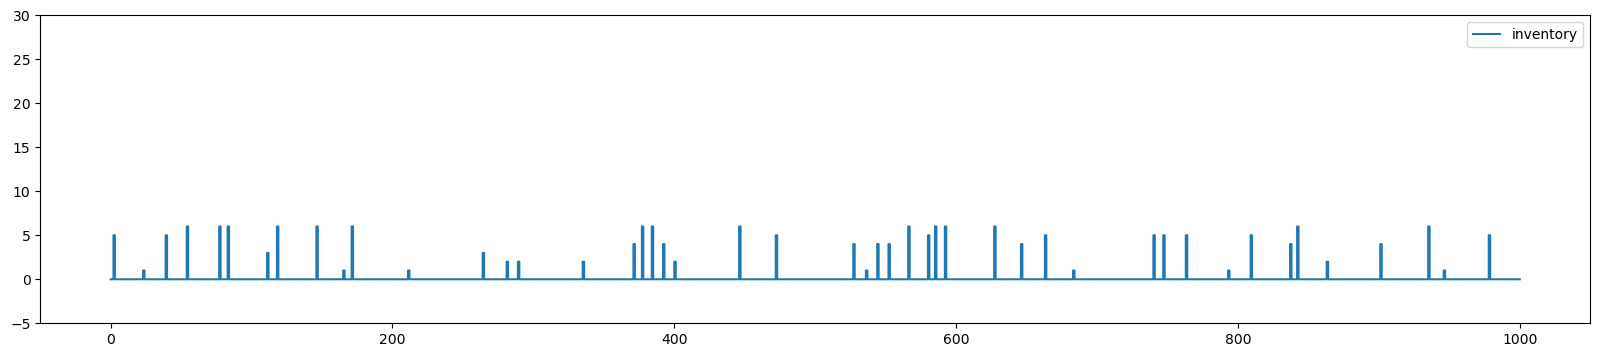

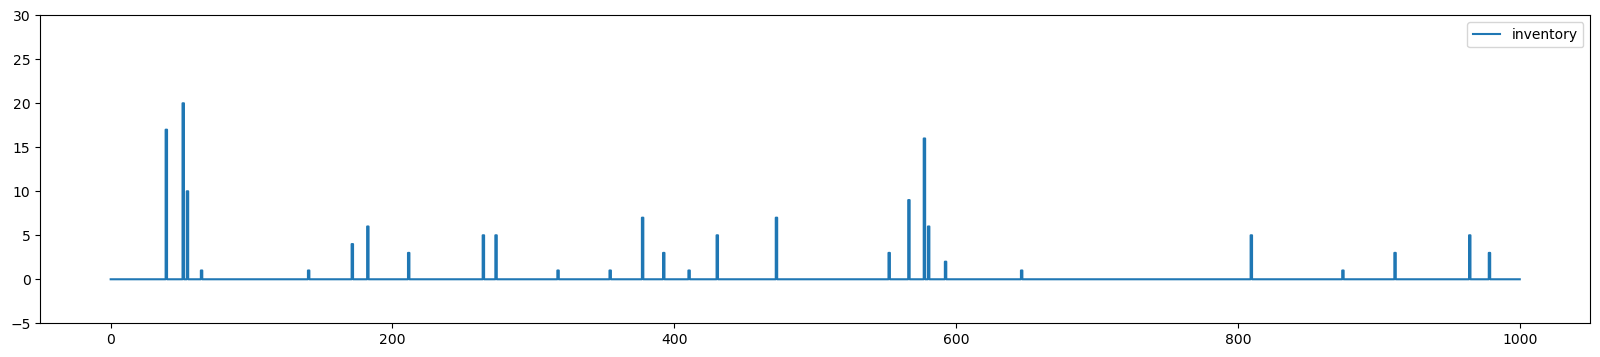

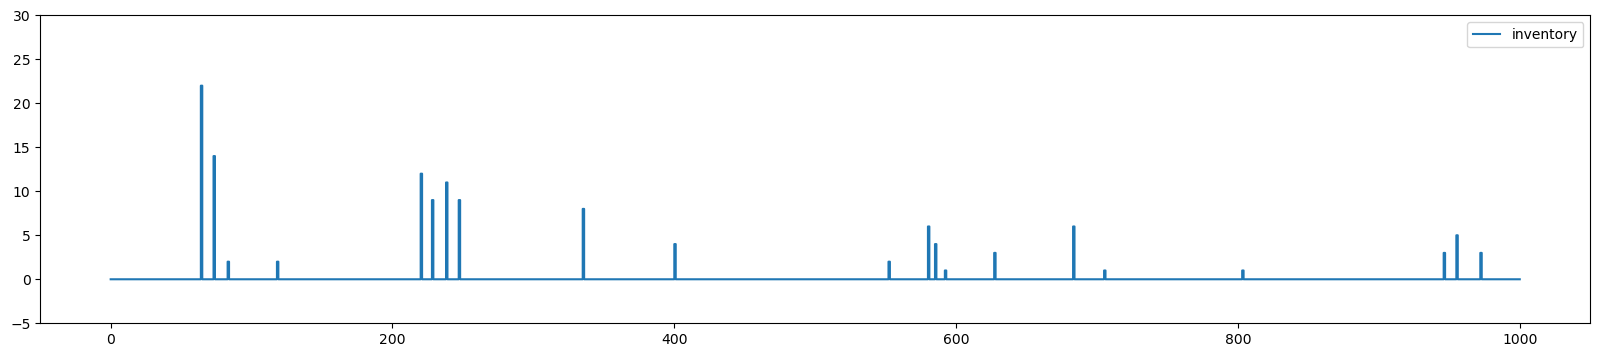

Rewards


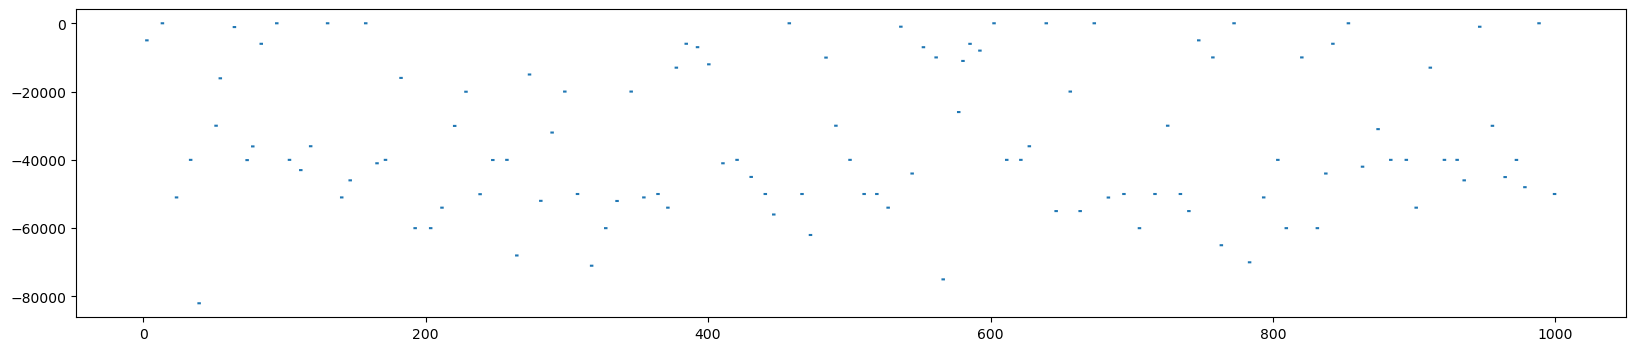

In [5]:
stateHistory, actionHistory, rewardHistory, experiences = game.runEpisode(envParams, plannerAgent, train=False)

visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

C:\Users\root\AppData\Local\Temp\ipykernel_14564\2774231855.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(N)):


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step
-44720.65
1/1 [==============================] - 0s 27ms/step
(array([0.33374357, 0.49142447, 0.17541184], dtype=float32), array([10., 10.,  0.], dtype=float32))


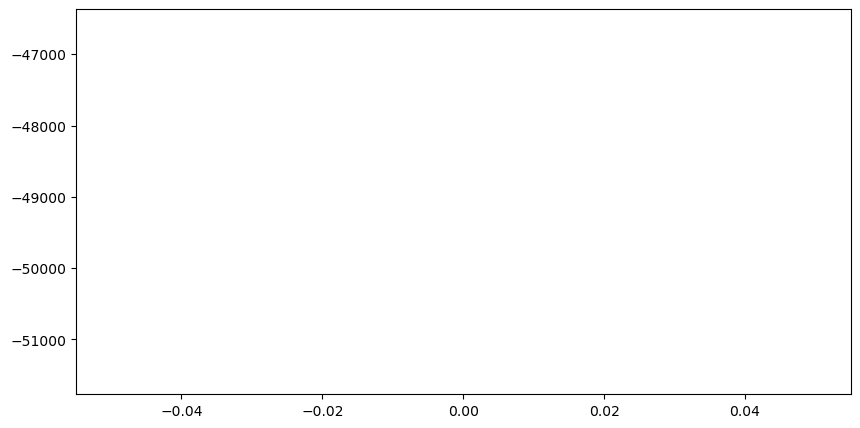

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 22ms/step
-43907.39
1/1 [==============================] - 0s 27ms/step
(array([2.3735135, 2.5454235, 0.3237849], dtype=float32), array([10., 10.,  0.], dtype=float32))


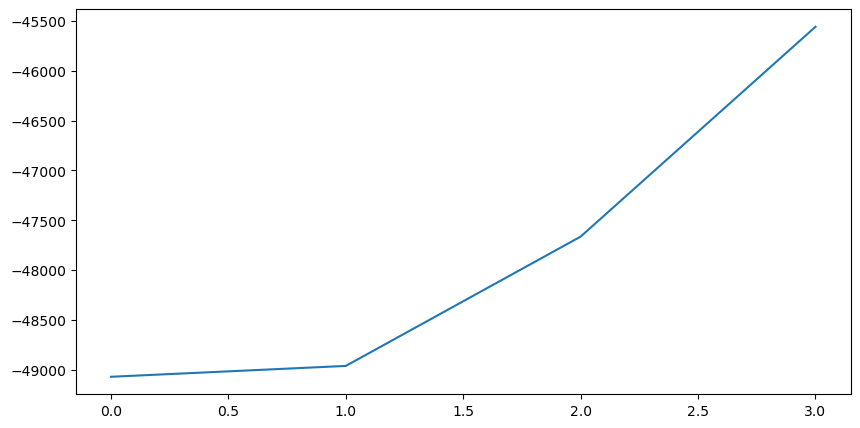

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step
-84943.7
1/1 [==============================] - 0s 30ms/step
(array([ 8.304931 , 10.357614 ,  3.0033083], dtype=float32), array([10., 10.,  3.], dtype=float32))


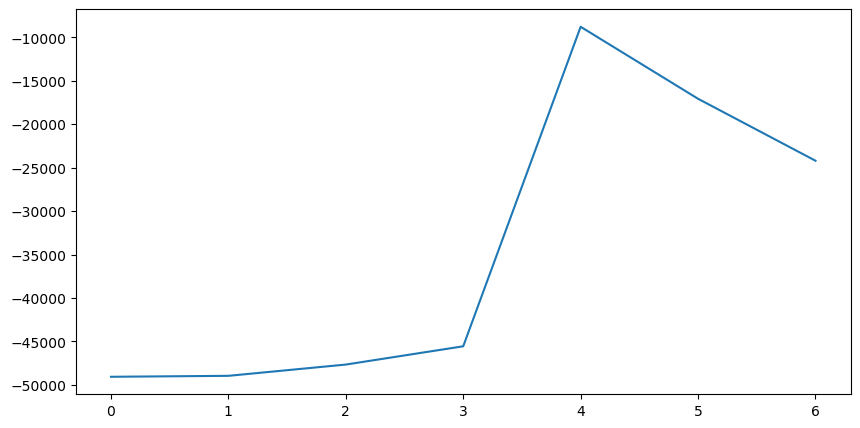

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step
-53406.258
1/1 [==============================] - 0s 28ms/step
(array([10.639884 ,  9.006359 ,  0.9873735], dtype=float32), array([11., 10.,  1.], dtype=float32))


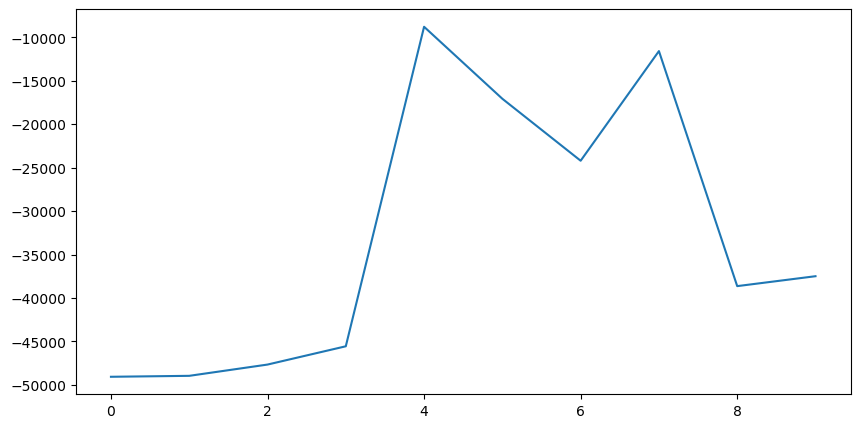

1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 24ms/step
-46194.293
1/1 [==============================] - 0s 28ms/step
(array([9.802919 , 5.589789 , 2.3696446], dtype=float32), array([10., 10.,  2.], dtype=float32))


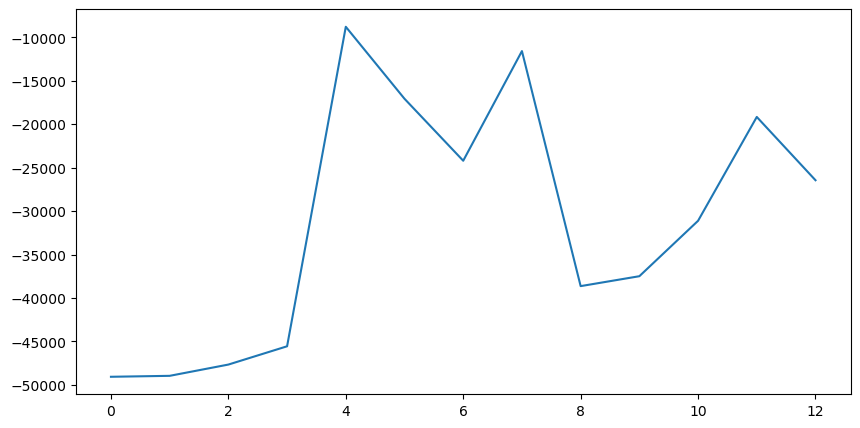

1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 39ms/step
-21110.822
1/1 [==============================] - 0s 28ms/step
(array([23.263012 , 12.044825 ,  3.2004604], dtype=float32), array([23., 12.,  3.], dtype=float32))


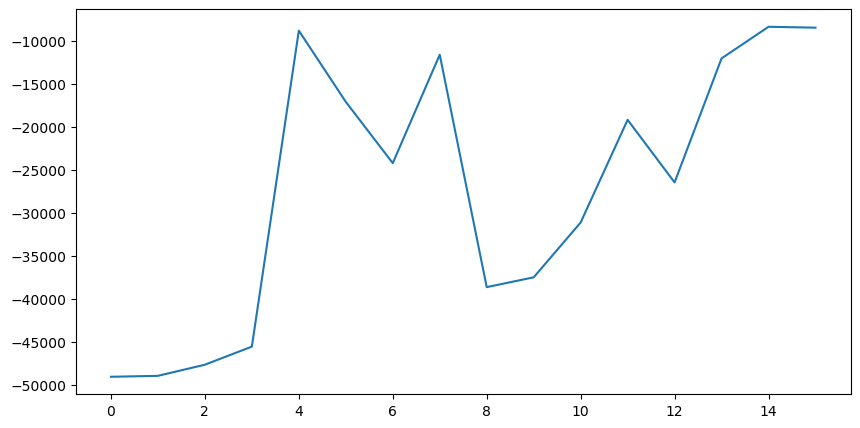

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 24ms/step
-69079.26
1/1 [==============================] - 0s 27ms/step
(array([19.124022 , 12.362901 ,  4.2358074], dtype=float32), array([19., 12.,  4.], dtype=float32))


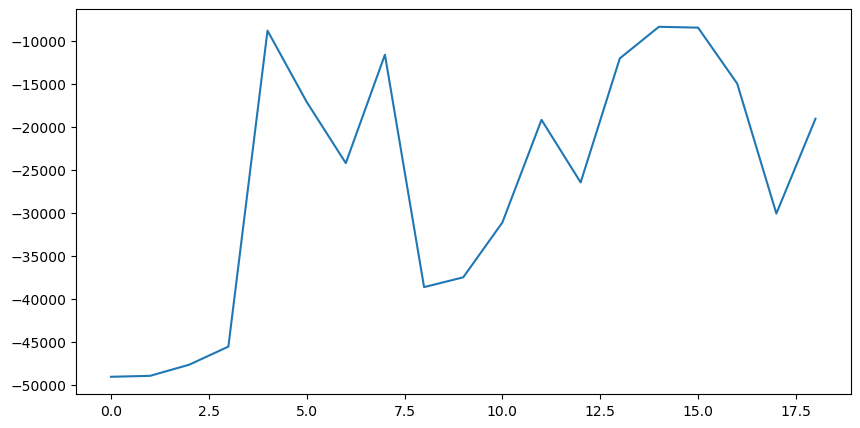

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step
-75042.91
1/1 [==============================] - 0s 27ms/step
(array([19.970816 , 10.846987 ,  2.1501853], dtype=float32), array([20., 11.,  2.], dtype=float32))


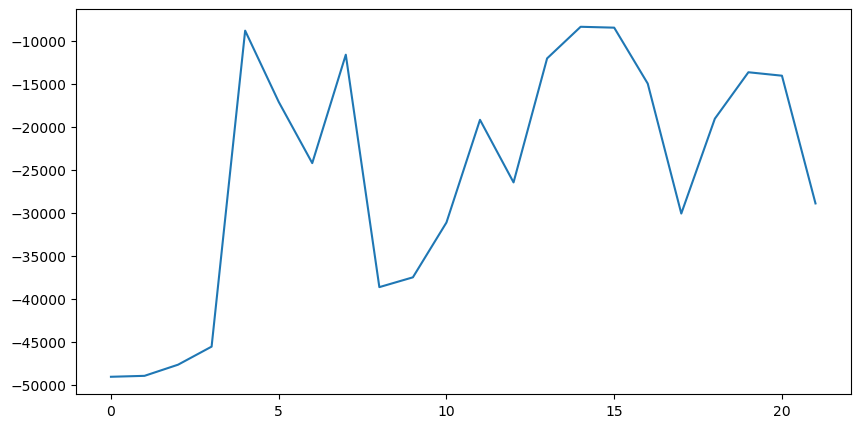

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step
-69097.46
1/1 [==============================] - 0s 34ms/step
(array([24.142065 , 16.02299  ,  2.2452722], dtype=float32), array([24., 16.,  2.], dtype=float32))


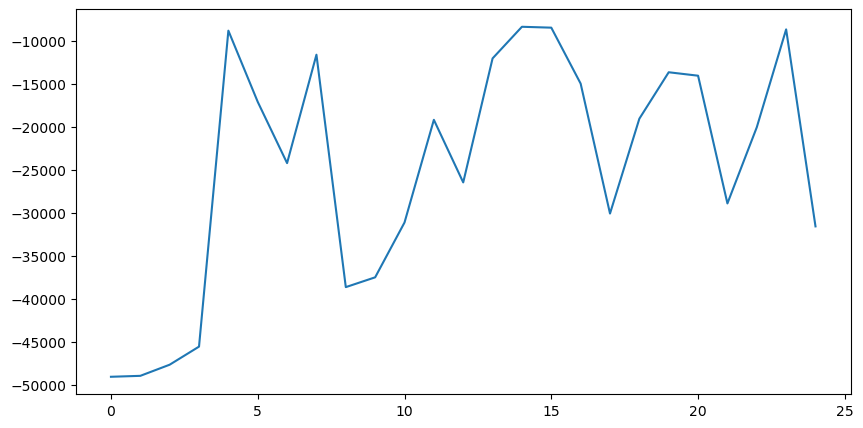

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 32ms/step
-63745.12
1/1 [==============================] - 0s 42ms/step
(array([19.271286, 13.083187,  3.382759], dtype=float32), array([19., 13.,  3.], dtype=float32))


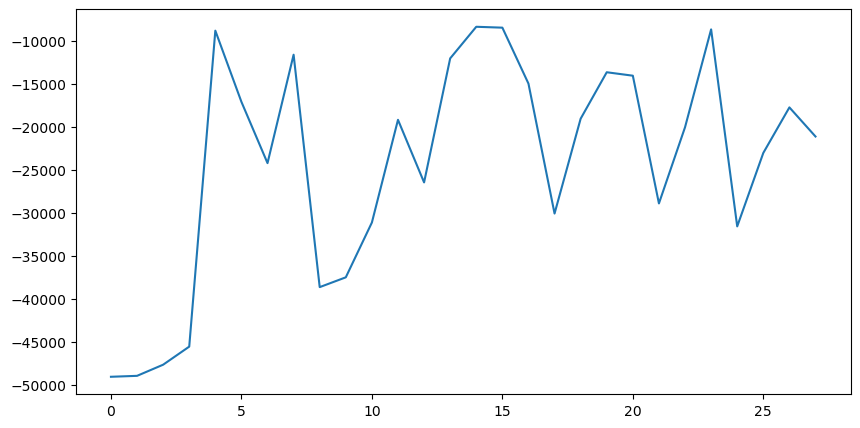

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


ResourceExhaustedError: Graph execution error:

Detected at node Adam/sub_26 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "D:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "D:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "D:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 607, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "D:\Anaconda\Lib\asyncio\events.py", line 80, in _run

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "D:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "D:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code

  File "C:\Users\root\AppData\Local\Temp\ipykernel_14564\2774231855.py", line 7, in <module>

  File "D:\stock\game.py", line 84, in runEpisode

  File "D:\stock\agent.py", line 410, in train

  File "D:\stock\agent.py", line 206, in update

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "D:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1130, in train_step

  File "D:\Anaconda\Lib\site-packages\keras\src\optimizers\optimizer.py", line 544, in minimize

  File "D:\Anaconda\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1223, in apply_gradients

  File "D:\Anaconda\Lib\site-packages\keras\src\optimizers\optimizer.py", line 652, in apply_gradients

  File "D:\Anaconda\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1253, in _internal_apply_gradients

  File "D:\Anaconda\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "D:\Anaconda\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1342, in apply_grad_to_update_var

  File "D:\Anaconda\Lib\site-packages\keras\src\optimizers\optimizer.py", line 241, in _update_step

  File "D:\Anaconda\Lib\site-packages\keras\src\optimizers\adam.py", line 198, in update_step

OOM when allocating tensor with shape[1000,1000] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node Adam/sub_26}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_13845]

In [6]:
rewardsAll = []
experienceAll = []
N = 200
for i in tqdm_notebook(range(N)):
    # play the game while trainings
    plannerAgent.policy_estimator.stdVal = 10
    _, _, rewards, experiences = game.runEpisode(envParams, plannerAgent, train=True)
    experienceAll.extend(experiences)
    
    # test
    plannerAgent.policy_estimator.stdVal = 0
    _, _, rewardHistory, _ = game.runEpisode(envParams, plannerAgent, train=False)
    averageRewards = np.nansum(rewardHistory)/np.count_nonzero(~np.isnan(rewardHistory))
    rewardsAll.append(averageRewards)
    
    if (i % 3 == 0): # & (i > 0):
        print(plannerAgent.value_estimator.predict(np.array([0, 0, 0])))
        print(plannerAgent.policy_estimator.predict(np.array([0, 0, 0]), capacity=[30, 30, 30], retailerOrderQty=10))
        plt.figure(figsize=(10, 5))
        plt.plot(rewardsAll)
        plt.show()
        

In [1]:
plt.hist(plannerAgent.policy_estimator.targetRecorder)
plt.show()

y = [10 * np.exp((x-1000) / 1000) for x in plannerAgent.policy_estimator.targetRecorder]
# y = [10 * np.exp(x / 2000) for x in plannerAgent.policy_estimator.targetRecorder]
plt.scatter(plannerAgent.policy_estimator.targetRecorder, y, alpha=0.2)
plt.ylim((0, 10))
plt.xlim((-10000, 0))
plt.show()

plt.hist(y, range=(0, 100))
plt.xlim((0, 100))
plt.show()

NameError: name 'plannerAgent' is not defined

In [ ]:
plannerAgent.policy_estimator.stdVal = 0
envParams["N"] = 1000

print(envParams["inventoryCost"])
# play the game while training
stateHistory, actionHistory, rewardHistory, experiences = game.runEpisode(envParams, plannerAgent, train=False)

visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

In [ ]:
# note reorder point
reorderPoints = stateHistory[:, 1, 2]
meanReorderPoint = reorderPoints.mean()

orders = actionHistory[:, 1, :]

# note inventories 0
node0Inventories = stateHistory[:, 0, 0] 
filterInv = np.roll(np.sign(orders[:, 0]), -1)
node0Inventories = node0Inventories[np.where(filterInv == 1)]
node0InventoryMean = node0Inventories.mean() if (len(node0Inventories) > 0) else 0

# note inventories 1
node1Inventories = stateHistory[:, 0, 1] 
filterInv = np.roll(np.sign(orders[:, 1]), -1)
node1Inventories = node1Inventories[np.where(filterInv == 1)]
node1InventoryMean = node1Inventories.mean() if (len(node1Inventories) > 0) else 0

print(envParams)
print(node0InventoryMean, node1InventoryMean, meanReorderPoint)